# Tutorial 09 Exploration B Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans # clustering
from sklearn.metrics import silhouette_score # clustering

In [2]:
# Load in iris dataset
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/iris.csv')
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


### 2. Elbow and silhouette methods to estimate the optimal number of clusters across all 4 measurements

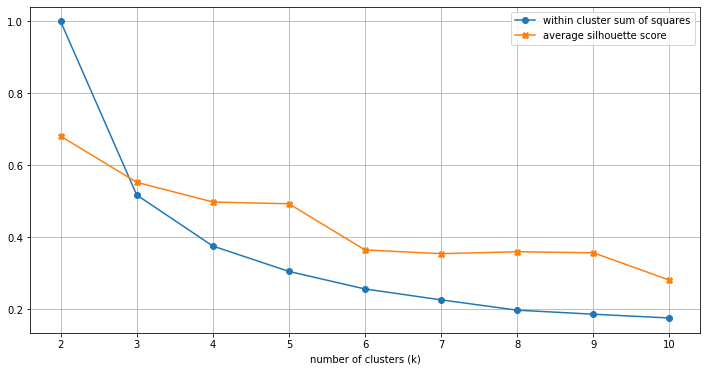

In [5]:
selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] # selected data to cluster
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(data[selected])
    WCSS = np.append(WCSS, k_means.inertia_)
    silhouette.append(silhouette_score(data[selected], labels))
WCSS = WCSS / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

### 3. Cluster data using K-Means algorithim with k=3

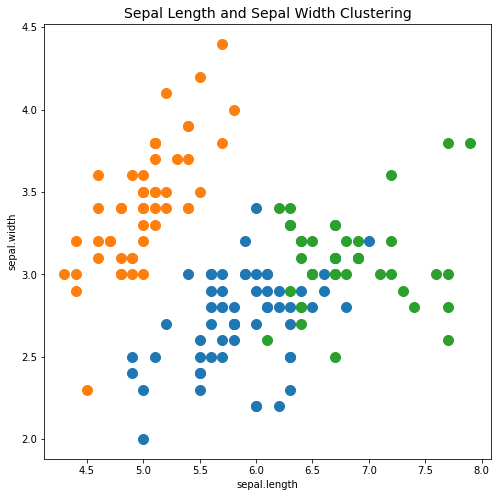

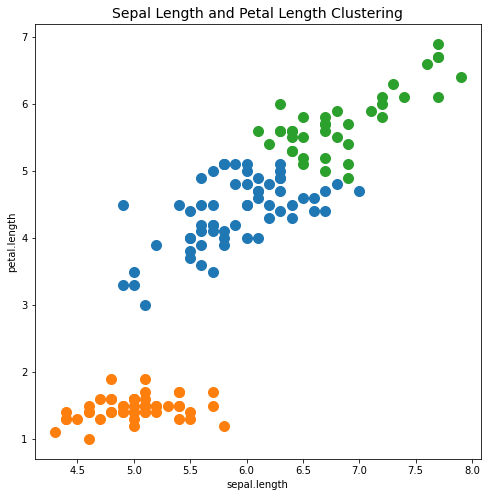

In [21]:
k = 3
selected = ['sepal.length', 'sepal.width', 'petal.length',  'petal.width']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
data['label'] = k_means.fit_predict(data[selected])

clusters = []
for c in range(k):
  clusters.append(data[data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
  plt.scatter(clusters[c]["sepal.length"], clusters[c]["sepal.width"], s=100)
#for i, name in enumerate(summary_data.index):
#    plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
plt.title("Sepal Length and Sepal Width Clustering", fontsize=14)
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.show()

plt.figure(figsize=(8, 8))
for c in range(k):
  plt.scatter(clusters[c]["sepal.length"], clusters[c]["petal.length"], s=100)
#for i, name in enumerate(summary_data.index):
#    plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
plt.title("Sepal Length and Petal Length Clustering", fontsize=14)
plt.xlabel("sepal.length")
plt.ylabel("petal.length")
plt.show()

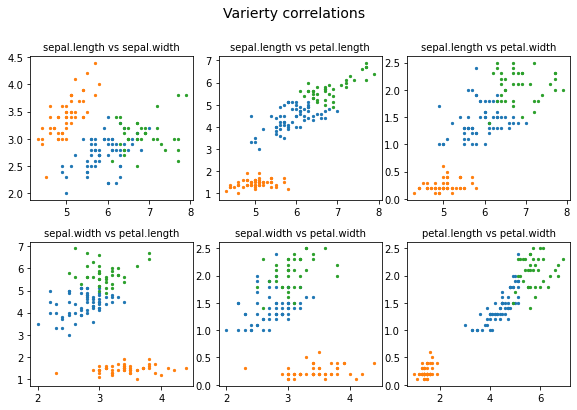

In [20]:
counter = 1
fig = plt.figure(figsize=(8,8))
fig.suptitle('Varierty correlations', fontsize=14, position=(0.5,1.0))
for i, name_i in enumerate(selected):
    for j in range(i+1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(3,3, counter)
        for c in range(k):
          plt.scatter(clusters[c][name_i], clusters[c][name_j], s=5)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        counter += 1
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.tight_layout()
plt.show()